In [232]:
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os

cwd = os.getcwd()
inputDir = cwd + "/input"

image = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
# display(pil_face_image)
# print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

for face_landmarks in face_landmarks_list:
    print("parametry częsci twarzy")
    print('left eye', face_landmarks['left_eye']) #6
    print('right eye', face_landmarks['right_eye']) #6
    print('nose tip', face_landmarks['nose_tip']) #5
    print('nose bridge', face_landmarks['nose_bridge']) #4
    print('top lip', face_landmarks['top_lip']) #12
    print('bottom lip', face_landmarks['bottom_lip']) #12

[(201, 409, 468, 141)]
parametry częsci twarzy
left eye [(59, 64), (75, 57), (91, 58), (105, 68), (90, 69), (73, 68)]
right eye [(173, 73), (188, 65), (204, 67), (216, 77), (203, 80), (188, 77)]
nose tip [(116, 135), (131, 140), (145, 144), (157, 142), (168, 139)]
nose bridge [(147, 62), (148, 81), (150, 101), (151, 121)]
top lip [(78, 179), (101, 169), (124, 166), (139, 170), (154, 169), (172, 175), (185, 189), (179, 188), (154, 177), (138, 176), (123, 174), (84, 179)]
bottom lip [(185, 189), (170, 204), (152, 208), (136, 208), (119, 205), (98, 198), (78, 179), (84, 179), (121, 194), (137, 197), (153, 196), (179, 188)]


I found 1 face(s) in this photograph.
The chin in this face has the following points: [(127, 287), (129, 324), (129, 360), (133, 395), (148, 425), (174, 448), (207, 463), (239, 474), (272, 479), (303, 477), (328, 466), (351, 449), (366, 426), (374, 397), (379, 365), (386, 334), (392, 302)]
The left_eyebrow in this face has the following points: [(167, 252), (188, 234), (215, 228), (243, 231), (271, 239)]
The right_eyebrow in this face has the following points: [(304, 244), (328, 239), (353, 240), (375, 251), (385, 272)]
The nose_bridge in this face has the following points: [(288, 263), (290, 282), (292, 301), (294, 322)]
The nose_tip in this face has the following points: [(260, 336), (274, 341), (287, 346), (298, 344), (308, 341)]
The left_eye in this face has the following points: [(201, 265), (215, 258), (231, 259), (244, 269), (230, 270), (214, 269)]
The right_eye in this face has the following points: [(314, 275), (330, 266), (345, 268), (358, 279), (344, 281), (329, 279)]
The to

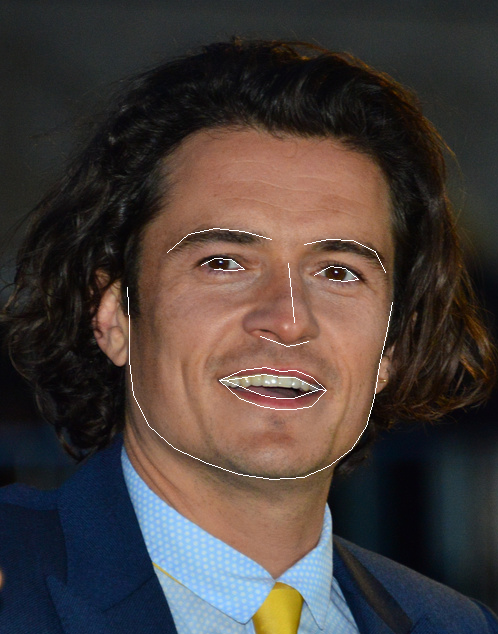

In [233]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
# image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")
image_to_draw = image[:]

# Find all facial features in all the faces in the image
face_landmarks_list_2 = face_recognition.face_landmarks(image_to_draw)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image2 = Image.fromarray(image_to_draw)
d = ImageDraw.Draw(pil_image2)

for face_landmarks in face_landmarks_list_2:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!  
    for facial_feature in face_landmarks.keys():
#         if facial_feature == 'left_eye':
#             d.line((face_landmarks[facial_feature][0],face_landmarks[facial_feature][3]), width=3)
#             d.line((face_landmarks[facial_feature][5],face_landmarks[facial_feature][2]), width=3)
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image2)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#

In [234]:
#============================ JO
def get_outmost_coordinates(feature_coordinates):
    padding = 20
    return {
        'left': min(feature_coordinates, key=lambda e: e[0])[0] - padding,
        'top': min(feature_coordinates, key=lambda e: e[1])[1] - padding,
        'right': max(feature_coordinates, key=lambda e: e[0])[0] + padding,
        'bottom': max(feature_coordinates, key=lambda e: e[1])[1] + padding,
    }

def crop_feature(landmarks, feature, image):
    if not np.isscalar(feature):
        all_coordinates = {}
        for f in feature:
            all_coordinates[f] = get_outmost_coordinates(landmarks[f])
        
        coordinates = {
            'left': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['left'])]['left'],
            'top': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['top'])]['top'],
            'right': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['right'])]['right'],
            'bottom': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['bottom'])]['bottom'],
        }
    else: 
        coordinates = get_outmost_coordinates(landmarks[feature])
    
    return image.crop(tuple(coordinates.values()))

lewe oko


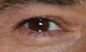

prawe oko


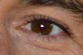

oczy i brwi


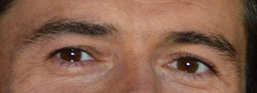

nos


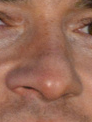

usta


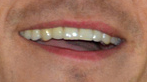

In [238]:
face_landmarks = face_landmarks_list[0]

print("lewe oko")
leftEye = crop_feature(face_landmarks, feature = 'left_eye', image = pil_face_image) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks, feature = 'right_eye', image = pil_face_image)
display(rightEye)

print("oczy i brwi")
eyes = crop_feature(face_landmarks, feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image)
display(eyes)

print("nos")
nose = crop_feature(face_landmarks, feature = ['nose_bridge', 'nose_tip'], image = pil_face_image)
display(nose)

print("usta")
lips = crop_feature(face_landmarks, feature = ['top_lip', 'bottom_lip'], image = pil_face_image)
display(lips)

lewe oko


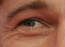

prawe oko


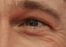

nos


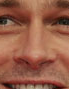

usta


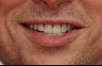

lewe oko


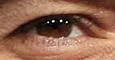

prawe oko


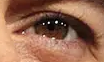

nos


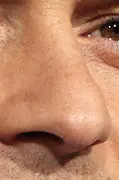

usta


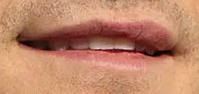

[False, True, True, False]
[(59, 64), (75, 57), (91, 58), (105, 68), (90, 69), (73, 68)]
[0.66758679 0.35883169 0.56262264 0.60061528]


In [243]:
# to wszystko jest w ramach testu, ten cell mozna wyrzucic
# robie chamskie kopiuj wklej bo to powinno byc zrealizonane przez czarka
image2nd = face_recognition.load_image_file(inputDir + "/brad_pitt/brad.jpg")
image3rd = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_2.jpg")

face_locations_2nd = face_recognition.face_locations(image2nd)
face_locations_3rd = face_recognition.face_locations(image3rd)

for face_location in face_locations_2nd:
    top, right, bottom, left = face_location
    face_image_2 = image2nd[top:bottom, left:right]
    pil_face_image_2 = Image.fromarray(face_image_2)
    
for face_location in face_locations_3rd:
    top, right, bottom, left = face_location
    face_image_3 = image3rd[top:bottom, left:right]
    pil_face_image_3 = Image.fromarray(face_image_3)
    
face_landmarks_list_2 = face_recognition.face_landmarks(face_image_2, model='large')
face_landmarks_list_3 = face_recognition.face_landmarks(face_image_3, model='large')


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_2[0], feature = 'left_eye', image = pil_face_image_2) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_2[0], feature = 'right_eye', image = pil_face_image_2)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_2[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_2)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_2[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_2)
display(lips)


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = 'left_eye', image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_3[0], feature = 'right_eye', image = pil_face_image_3)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_3[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_3)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_3[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_3)
display(lips)


image4 = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_3.png")
image5 = face_recognition.load_image_file(inputDir + "/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg") #Orlando_Bloom_4
face_locations_4 = face_recognition.face_locations(image4)
face_locations_5 = face_recognition.face_locations(image5)
enc_4 = face_recognition.face_encodings(image4, face_locations_4, model='large')
enc_5 = face_recognition.face_encodings(image5, face_locations_5, model='large')

face_encodings = [ 
    face_recognition.face_encodings(image2nd, face_locations_2nd, model='large')[0], 
    face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0], 
    face_recognition.face_encodings(image4, face_locations_4, model='large')[0], 
    face_recognition.face_encodings(image5, face_locations_5, model='large')[0], 
]
face_encoding = face_recognition.face_encodings(image, face_locations, model='large')[0]

print(face_recognition.compare_faces(face_encodings, face_encoding))

# single feature
print(face_landmarks['left_eye'])
print(face_recognition.face_distance(face_encodings, face_encoding))


lewe oko


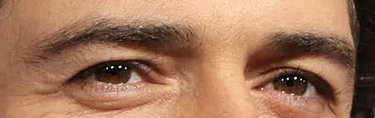

[(201, 409, 468, 141)] [(0, 0, 375, 118)]
[array([-0.05102115,  0.09309785,  0.035631  ,  0.02021889, -0.07377174,
       -0.08950807, -0.0388397 , -0.04007498,  0.12158279, -0.01194712,
        0.23974016, -0.00199662, -0.21627599, -0.11585219,  0.00497689,
        0.09128544, -0.13254835, -0.03140263, -0.14727305, -0.13569698,
        0.01178715,  0.00467167,  0.02531587, -0.00450719, -0.13719919,
       -0.22485466, -0.08057653, -0.13524321,  0.09316476, -0.181622  ,
        0.03359182,  0.05611412, -0.18378659, -0.09528784, -0.01930109,
        0.01821876,  0.02108023, -0.06470916,  0.13138813, -0.01911601,
       -0.10490654, -0.01982196, -0.02789382,  0.25789967,  0.18574366,
        0.00407232,  0.00391617, -0.06259908,  0.0972333 , -0.24176195,
        0.00592358,  0.1232119 ,  0.0760415 ,  0.09440633,  0.04516409,
       -0.14981568,  0.04080665,  0.11314067, -0.18805796,  0.01312431,
        0.0235003 , -0.06354661, -0.08675709, -0.08200653,  0.21256094,
        0.08775183, -

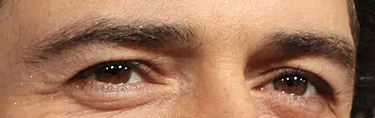

In [306]:
### ta czesc jest zabrana z face_recognition lib - start

import dlib
import face_recognition_models

predictor_68_point_model = face_recognition_models.pose_predictor_model_location()
pose_predictor_68_point = dlib.shape_predictor(predictor_68_point_model)

face_recognition_model = face_recognition_models.face_recognition_model_location()
face_encoder = dlib.face_recognition_model_v1(face_recognition_model)

face_detector = dlib.get_frontal_face_detector()

def _css_to_rect(css):
    """
    Convert a tuple in (top, right, bottom, left) order to a dlib `rect` object
    :param css:  plain tuple representation of the rect in (top, right, bottom, left) order
    :return: a dlib `rect` object
    """
    return dlib.rectangle(css[3], css[0], css[1], css[2])

def _raw_face_locations(img, number_of_times_to_upsample=1, model="hog"):
    """
    Returns an array of bounding boxes of human faces in a image
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of dlib 'rect' objects of found face locations
    """
    if model == "cnn":
        return cnn_face_detector(img, number_of_times_to_upsample)
    else:
        return face_detector(img, number_of_times_to_upsample)

    
def _raw_face_landmarks(face_image, face_locations=None, model="large"):
    if face_locations is None:
        face_locations = _raw_face_locations(face_image)
    else:
        face_locations = [_css_to_rect(face_location) for face_location in face_locations]

    pose_predictor = pose_predictor_68_point

    if model == "small":
        pose_predictor = pose_predictor_5_point

    return [pose_predictor(face_image, face_location) for face_location in face_locations]


def face_encodings(face_image, known_face_locations=None, num_jitters=1, model="small"):
    """
    Given an image, return the 128-dimension face encoding for each face in the image.
    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :param model: Optional - which model to use. "large" or "small" (default) which only returns 5 points but is faster.
    :return: A list of 128-dimensional face encodings (one for each face in the image)
    """
    raw_landmarks = _raw_face_landmarks(face_image, known_face_locations, model)
    return [np.array(face_encoder.compute_face_descriptor(face_image, raw_landmark_set, num_jitters)) for raw_landmark_set in raw_landmarks]

enc = face_recognition.face_encodings(image3rd, face_locations_3rd, model='large')[0]
own_enc = face_encodings(image3rd, face_locations_3rd, model='large')[0]

# print(enc == own_enc)


### ta czesc jest zabrana z face_recognition lib - end

# encoding tylko czesci ciala

print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = ['left_eye', 'right_eye', 'left_eyebrow', 'right_eyebrow'], image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)
path = inputDir + '/orlando_bloom/left_eye.jpg'
leftEye.save(path)

partialImage = face_recognition.load_image_file(path)
face_locations_partial = face_recognition.face_locations(partialImage)

dimensions = tuple([0, 0, leftEye.size[0], leftEye.size[1]])

print(face_locations, [dimensions])

raw_landmarks = _raw_face_landmarks(image3rd, [dimensions], 'large')
partial_enc = [np.array(face_encoder.compute_face_descriptor(image3rd, raw_landmark_set, 1)) for raw_landmark_set in raw_landmarks]
print(partial_enc)

partial_landmarks = face_recognition.face_landmarks(image3rd, [dimensions], 'large')

landmarks_as_tuples = [[(p.x, p.y) for p in landmark.parts()] for landmark in raw_landmarks]
print(landmarks_as_tuples[0], len(landmarks_as_tuples[0]))


pil_image = leftEye #Image.fromarray(leftEye)
d = ImageDraw.Draw(pil_image)

for point in landmarks_as_tuples[0]:
    print(point)
    d.point(point)
    
display(pil_image) # wrong result, we can't use this to determine encoding
# 1. can we determine which part of encoding is the eye?
# 2. can we use different comparision?
# 3. should we drop this idea, it's not in the doc

#============================ koniec JO